##### Debanjan Chatterjee
##### Email id : debanjanc2020@gmail.com
##### Batch Number : DSG0323  

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')


In [168]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, roc_curve, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

In [2]:
df1 = pd.read_csv('Table1.csv')
df2 = pd.read_csv('Table2.csv')
df3 = pd.read_csv('Table3.csv')

In [3]:
fdata = pd.concat([df1, df2, df3], axis = 1)

In [4]:
fdata

,SL_no,Brand_name,category,product_type,product_name,product_code,price,SL_ no,wear type,material type,...,colour 4,reviews,SL_no,occasion,return_time,country_origin,size1,size2,size3,size4
0,1,BOMBAY BEGUM,MEN,shirt,Men Regular Fit Shirt with Cutaway Collar,4.671620e+11,440,1,top wear,cotton,...,Grey,113,1,casual,10.0,India,S,M,L,XL
1,2,BULLMER,MEN,T- shirts,Loose Fit Graphic Print Round-Neck T-Shirt,4.664280e+11,388,2,top wear,cotton,...,Grey,339,2,casual,10.0,India,S,M,L,XL
2,3,BOMBAY BEGUM,MEN,shirt,Spread Collar Shirt with Patch Pocket,4.671620e+11,460,3,top wear,cotton,...,Grey,35,3,casual,10.0,India,XS,M,XL,XXL
3,4,BOMBAY BEGUM,MEN,shirt,Men Regular Fit Shirt with Short Sleeves,4.671620e+11,440,4,top wear,cotton,...,Grey,407,4,casual,10.0,India,S,M,L,XL
4,5,BULLMER,MEN,T- shirts,Loose Fit Graphic Print Crew-Neck T-Shirt,4.664280e+11,388,5,top wear,cotton,...,Grey,410,5,casual,10.0,India,S,M,L,XL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5881,5882,SHRI GIRIRAJ TRADERS,WOMEN,Churidar,Cotton Women Churidar,3.990738e+07,427,5882,bottom wear,Cotton,...,white,5965,5882,casual,10.0,india,FS,-----,-----,-----
5882,5883,Karigari,WOMEN,Churidar,Cotton Women Churidar,9.182937e+07,379,5883,bottom wear,Cotton,...,white,9645,5883,casual,10.0,india,X,-----,L,-----
5883,5884,Karigari,WOMEN,Churidar,Cotton Women Churidar,2.276813e+07,379,5884,bottom wear,Cotton,...,white,8830,5884,casual,10.0,india,X,-----,L,-----
5884,5885,Sarthak Fashion,WOMEN,Churidar,Cotton Women Churidar,8.481292e+07,499,5885,bottom wear,Cotton,...,white,6804,5885,casual,10.0,india,FS,-----,-----,-----


In [5]:
data = fdata.drop(['product_code', 'product_name'], axis=1)

In [6]:
data['price'] = data['price'].str.replace(',', '').astype(float)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5886 entries, 0 to 5885
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL_no           5886 non-null   int64  
 1   Brand_name      5886 non-null   object 
 2   category        5886 non-null   object 
 3   product_type    5886 non-null   object 
 4   price           5886 non-null   float64
 5   SL_ no          5886 non-null   int64  
 6   wear type       5886 non-null   object 
 7   material type   5886 non-null   object 
 8   colour 1        5886 non-null   object 
 9   colour 2        5886 non-null   object 
 10  colour 3        5886 non-null   object 
 11  colour 4        5886 non-null   object 
 12  reviews         5886 non-null   int64  
 13  SL_no           5886 non-null   int64  
 14  occasion        5886 non-null   object 
 15  return_time     5041 non-null   float64
 16  country_origin  5886 non-null   object 
 17  size1           5886 non-null   o

In [8]:
#removing the SL no columns that are repeated 
data = data.drop(columns=data.columns[[5, 13]])

In [9]:
#value counts of every columns 
for i in data.columns:
    print(data[i].value_counts())

Fab india         825
NETPLAY           290
PETER ENGLAND     200
PUMA              184
Raymond           167
                 ... 
KETCH               1
Shrivani            1
Aulesa              1
KASSUALLY           1
PKCreations         1
Name: Brand_name, Length: 524, dtype: int64
WOMEN     2763
MEN       2278
male       649
female     196
Name: category, dtype: int64
women             1161
T- shirts          555
Regular            402
dress              284
formal shirt       265
shirt              240
Patiala            240
Shirt              237
casual shirt       237
Churidar           227
formal trouser     200
sports wear        199
casual trouser     199
regular            198
Kurta              167
Top                162
Casual             141
pants              140
Formal             125
kurta              120
sarees             100
kurtas              75
churidars           59
salwar              39
trouser             37
Kaftan              35
shorts              17
chur

In [10]:
data['return_time'].value_counts()

10.0    4216
30.0     825
Name: return_time, dtype: int64

In [11]:
mean_rt = data['return_time'].mean()
data['return_time'] = data['return_time'].fillna(mean_rt )

In [12]:
data.describe()

,price,reviews,return_time
count,5886.000000,5886.000000,5886.000000
mean,971.084098,2334.607713,13.273160
std,1046.236923,3084.886345,6.848188
min,29.000000,1.000000,10.000000
25%,499.000000,92.000000,10.000000
50%,759.000000,451.500000,10.000000
75%,1049.000000,4329.750000,13.273160
max,21999.000000,9988.000000,30.000000


# observation

* The prices of the items range from 29 to 21,999, with a mean price of 971.08.
* The standard deviation of prices is relatively high, indicating a wide spread of prices around the mean.
* The majority of prices (25% to 75%) fall between 499 and 1,049.
* The number of reviews per item ranges from 1 to 9,988, with an average of approximately 2,334.61 reviews.
* The standard deviation in reviews is also quite high, suggesting a significant variation in the number of reviews across items.
* The lowest number of reviews observed is 1, while the highest is 9,988.
* The return time for items ranges from 10 to 30 days, with a mean return time of approximately 13.27 days.
* The standard deviation in return times is moderate, indicating some variation but not as much as seen in prices and reviews.
* The most common return time appears to be 10 days, as indicated by the median (50th percentile) and the 25th percentile.

Brand Name:

* The br The most frequent brands appear prominently, suggesting they might be major players or more commonly available products in the market covered by the dataset.

Category:
* The categories are well-distributed, indicating a diverse range of products. Some categories are more common, which could reflect a higher consumer demand or a larger number of products available in those categories.

Product Type:
* Similar to categories, the product types show a range of items. The frequency of certain product types can inform about the trends or preferences in the market.

Product Name:
* the product names are quite varied, with some names appearing more frequently. This could indicate popular products or those that are stocked more due to consumer preference.

In [13]:
data.columns

Index(['Brand_name', 'category', 'product_type', 'price', 'wear type',
       'material type', 'colour 1', 'colour 2', 'colour 3', 'colour 4',
       'reviews', 'occasion', 'return_time', 'country_origin', 'size1',
       'size2', 'size3', 'size4'],
      dtype='object')

### bi variate analysis

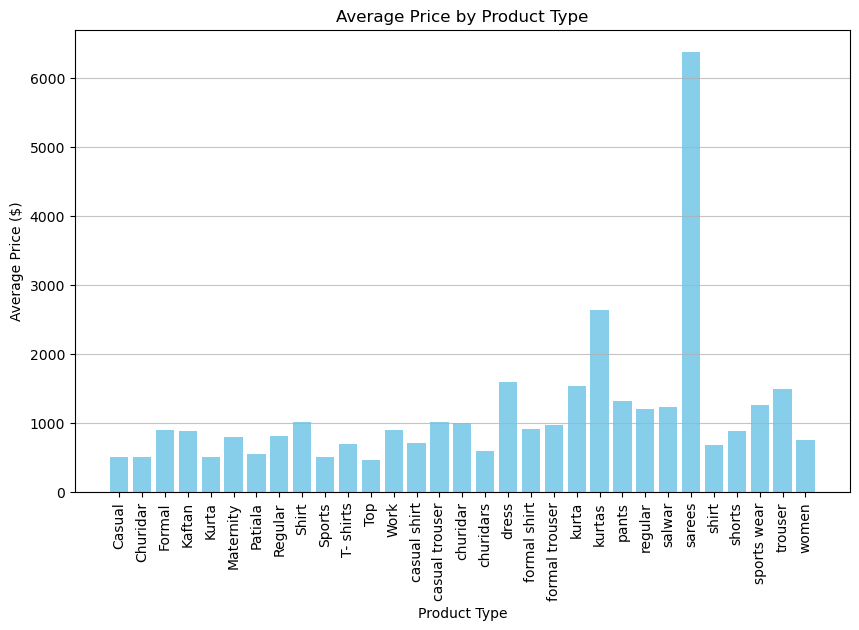

In [14]:
avgprs = data.groupby('product_type')['price'].mean().reset_index()

# Plotting the graph against price and product type
plt.figure(figsize=(10, 6))
plt.bar(avgprs['product_type'], avgprs['price'], color='skyblue')
plt.title('Average Price by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation= 90)
plt.grid(axis='y', alpha=0.75)
plt.show()

* the above bar graph that shows the average price by product type for various clothing items.  
* The most expensive items on average are sarees, costing around 5,000 rupees.  
* Other expensive items include formal shirts and formal trousers, each costing around 4,000 rupees.
* The least expensive items are casual shirts and casual trousers, each costing around 1,000 rupees.

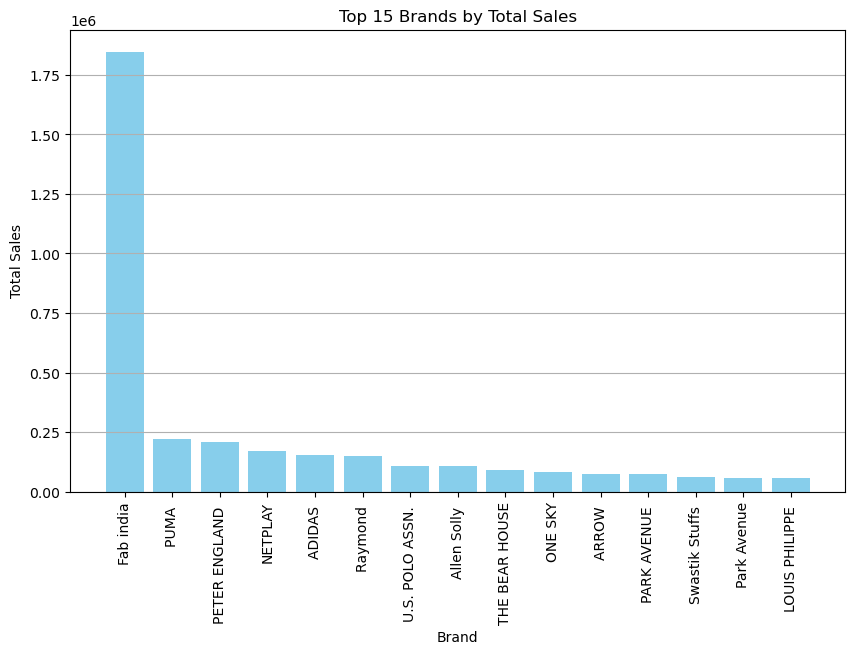

In [15]:
tots = data.groupby('Brand_name')['price'].sum().reset_index()

# Select top N brands based on total sales
tps = tots.nlargest(15, 'price')

# Plotting bar chart for top 10 brands by total sales
plt.figure(figsize=(10, 6))
plt.bar(tps['Brand_name'], tps['price'], color='skyblue')
plt.title(f'Top 15 Brands by Total Sales')
plt.xlabel('Brand')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

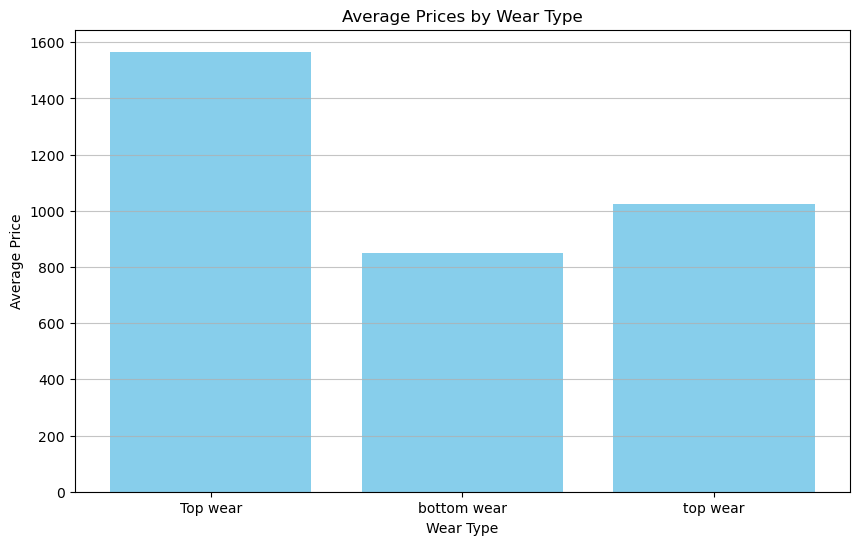

In [16]:
# Plotting grouped bar chart for average prices by wear type
avgps = data.groupby('wear type')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(avgps['wear type'], avgps['price'], color='skyblue')
plt.title('Average Prices by Wear Type')
plt.xlabel('Wear Type')
plt.ylabel('Average Price')
plt.grid(axis='y', alpha=0.75)
plt.show()

* bar graph titled  “Average Prices by Wear Type”. 
* The y-axis shows the average price and the x-axis shows the wear type. 
* The most expensive type of clothing is top wear, with an average price of ₹1600. 
* The least expensive type of clothing is bottom wear, with an average price of ₹400.

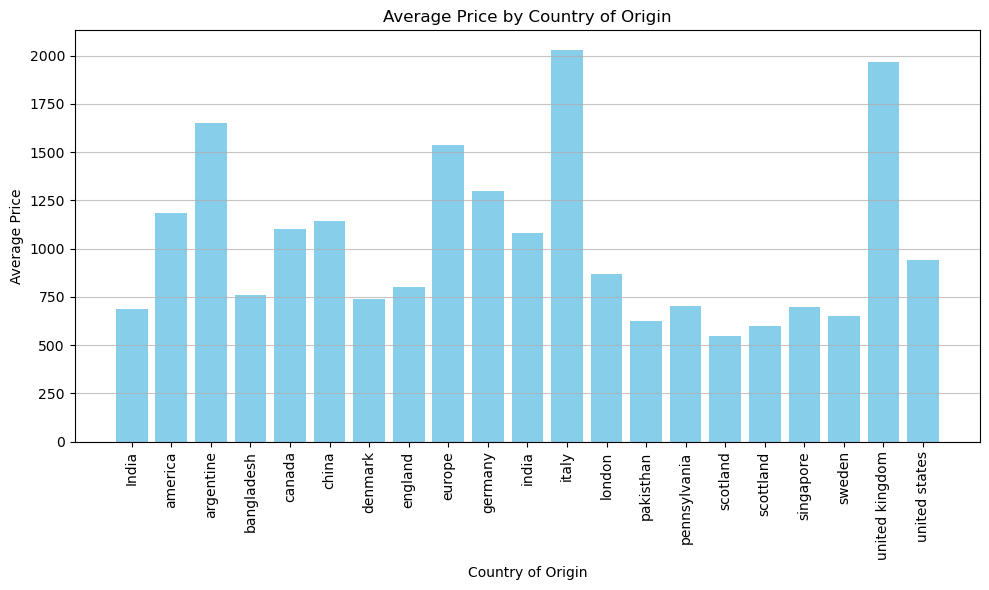

In [17]:
avgpc = data.groupby('country_origin')['price'].mean().reset_index()

# Plotting grouped bar chart for average price by country of origin
plt.figure(figsize=(10, 6))
plt.bar(avgpc['country_origin'], avgpc['price'], color='skyblue')
plt.title('Average Price by Country of Origin')
plt.xlabel('Country of Origin')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

* ountries like Italy and Argentine stand out with higher average prices (2029.05 rupees and 1650.00 rupees, respectively). This suggests that these regions may have a strong presence in high-end or luxury product markets, potentially catering to niche or affluent consumer segments.


* On the other hand, countries like India, China, and the United States showcase competitive mid-range pricing, with average prices ranging between 1000 rupees to 1200 rupees. This indicates a robust market for moderately priced products, appealing to a broader consumer base.


* Some countries like Bangladesh, Pakistan, and Scotland exhibit lower average prices (548.34 rupees to 759.00 rupees), which could signify value-oriented markets or possibly sectors focused on affordability and accessibility for consumers.

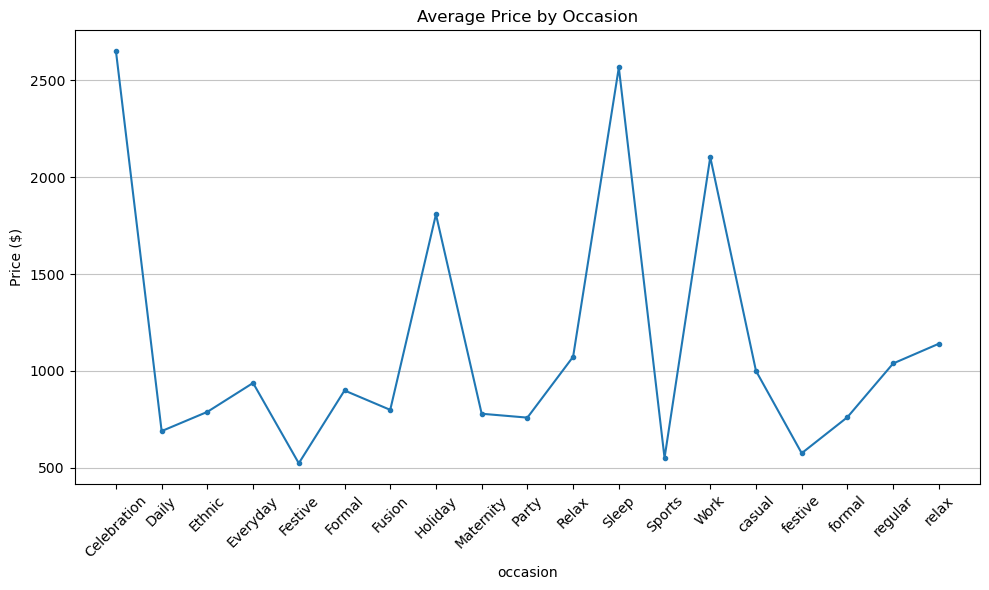

In [18]:
# Plotting line chart for price vs. occasion
avgp = data.groupby('occasion')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(avgp['occasion'], avgp['price'], marker='.')
plt.title('Average Price by Occasion')
plt.xlabel('occasion')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

* Festive, formal, and maternity wear appear to be the most expensive based on their position on the right side of the chart.
* Relax, sleep, and sports wear seem to be on the left side of the chart, suggesting they might be associated with lower priced clothing.

In [19]:
data.columns

Index(['Brand_name', 'category', 'product_type', 'price', 'wear type',
       'material type', 'colour 1', 'colour 2', 'colour 3', 'colour 4',
       'reviews', 'occasion', 'return_time', 'country_origin', 'size1',
       'size2', 'size3', 'size4'],
      dtype='object')

In [20]:
#ENCODING WEAR TYPE COLUMN
data['wear type'] = data['wear type'].apply(lambda x: 1 if x in ['Top wear', 'top wear'] else 2 )

In [21]:
#ENCODING CATEGORY COLUMN
data['category'] = data['category'].apply(lambda x: 1 if x in ['MEN', 'male'] else 2 if x in ['female', 'WOMEN'] else None)

In [22]:
data['wear type'].unique()

array([1, 2], dtype=int64)

In [23]:
data['material type'].unique()

array(['cotton', 'Regular Fit', 'polycotton', 'polyester', 'cottob blend',
       'Satin', 'Poly lycra', 'rayon', 'Pure cotton', 'Lycra',
       'Relaxed Fit', 'Curved hemline', 'Viscose', 'Denim',
       'cotton polyester', 'viscose rayon', 'silk blend', 'viscose',
       'Cotton Linen ', 'silk', 'Georgette ', 'Lycra\nMachine Wash',
       'cotton lycra', 'nylon', 'wool blend', 'wool', 'viscose lycra',
       'Machine wash', 'Cotton', 'Viscose Silk', 'Viscose Blend',
       'Linen Blend', 'Linen', 'Silk', 'Silk Blend', 'Cotton Linen',
       'Wool', 'Cotton Silk', 'Rayon Blend', 'Cotton Silk Blend',
       'Pure Cotton', 'Polycotton', 'Pure Linen', 'Lyocell',
       'Cotton Lycra', 'Poly Cotton', 'Organic Cotton', 'Lycra Blend',
       'viscose rayon ', 'khaki', 'Viscose Rayon', 'Nylon', 'Chiffon',
       'Velvet', 'Georgette', 'Crepe', 'Rayon',
       'Georgette Kaftan, 3D Digital Printed', 'Cotton Satin Blend',
       'Cotton Lycra Blend', 'Shimmer', 'Pure Crepe',
       'Synthetic 

In [24]:
data['product_type'].unique()

array(['shirt', 'T- shirts', 'women', 'Casual', 'Work', 'Regular',
       'Sports', 'Kurta', 'Formal', 'Maternity', 'Shirt', 'kurta',
       'trouser', 'churidar', 'shorts', 'kurtas', 'sarees', 'dress',
       'salwar', 'churidars', 'pants', 'formal shirt', 'casual shirt',
       'formal trouser', 'casual trouser', 'sports wear', 'regular',
       'Top', 'Kaftan', 'Patiala', 'Churidar'], dtype=object)

In [37]:
data['occasion'].unique()

array(['casual', 'regular', 'Everyday', 'relax', 'Work', 'Sports',
       'Festive', 'Fusion', 'Daily', 'Formal', 'Maternity', 'Ethnic',
       'Party', 'Holiday', 'Celebration', 'Relax', 'Sleep', 'formal',
       'festive'], dtype=object)

In [27]:
data['country_origin'].unique()

array(['India', 'china', 'pennsylvania', 'india', 'america', 'europe',
       'united kingdom', 'italy', 'germany', 'argentine', 'singapore',
       'scotland', 'denmark', 'sweden', 'london', 'england', 'pakisthan',
       'scottland', 'bangladesh', 'united states', 'canada'], dtype=object)

In [28]:
data['return_time'].fillna( data['return_time'].mean())

0       10.0
1       10.0
2       10.0
3       10.0
4       10.0
        ... 
5881    10.0
5882    10.0
5883    10.0
5884    10.0
5885    10.0
Name: return_time, Length: 5886, dtype: float64

In [31]:
selected_columns = ['product_type', 'material type', 'country_origin']
dfs = data[selected_columns]

# Initialize BinaryEncoder for specific columns only
encoder = ce.BinaryEncoder(cols=selected_columns)

# Fit and transform the selected data
dfen = encoder.fit_transform(dfs)

# Concatenate df_encoded with df_data (excluding the columns to be encoded)
data = pd.concat([data.drop(columns=selected_columns), dfen], axis=1)

In [32]:
# encoding the colour columns with label encoding
encoder = LabelEncoder()
data['colour 1'] = encoder.fit_transform(data['colour 1'])
data['colour 2'] = encoder.fit_transform(data['colour 2'])
data['colour 3'] = encoder.fit_transform(data['colour 3'])
data['colour 4'] = encoder.fit_transform(data['colour 4'])

In [33]:
# encoding the colour columns with label encoding
data['size1'] = encoder.fit_transform(data['size1'])
data['size2'] = encoder.fit_transform(data['size2'])
data['size3'] = encoder.fit_transform(data['size3'])
data['size4'] = encoder.fit_transform(data['size4'])



In [34]:
data['Brand_name'] =  encoder.fit_transform(data['Brand_name'])


In [38]:
#encoding the occasion
data['occasion'] =  encoder.fit_transform(data['occasion'])

In [39]:
data

,Brand_name,category,price,wear type,colour 1,colour 2,colour 3,colour 4,reviews,occasion,...,material type_2,material type_3,material type_4,material type_5,material type_6,country_origin_0,country_origin_1,country_origin_2,country_origin_3,country_origin_4
0,44,1,440.0,1,75,54,24,1,113,14,...,0,0,0,0,1,0,0,0,0,1
1,48,1,388.0,1,75,54,24,1,339,14,...,0,0,0,0,1,0,0,0,0,1
2,44,1,460.0,1,75,54,24,1,35,14,...,0,0,0,0,1,0,0,0,0,1
3,44,1,440.0,1,75,54,24,1,407,14,...,0,0,0,0,1,0,0,0,0,1
4,48,1,388.0,1,75,54,24,1,410,14,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5881,353,2,427.0,2,76,14,24,18,5965,14,...,1,1,1,0,1,0,0,1,0,0
5882,220,2,379.0,2,76,14,24,18,9645,14,...,1,1,1,0,1,0,0,1,0,0
5883,220,2,379.0,2,76,14,24,18,8830,14,...,1,1,1,0,1,0,0,1,0,0
5884,369,2,499.0,2,76,14,24,18,6804,14,...,1,1,1,0,1,0,0,1,0,0


### multivariate analysis

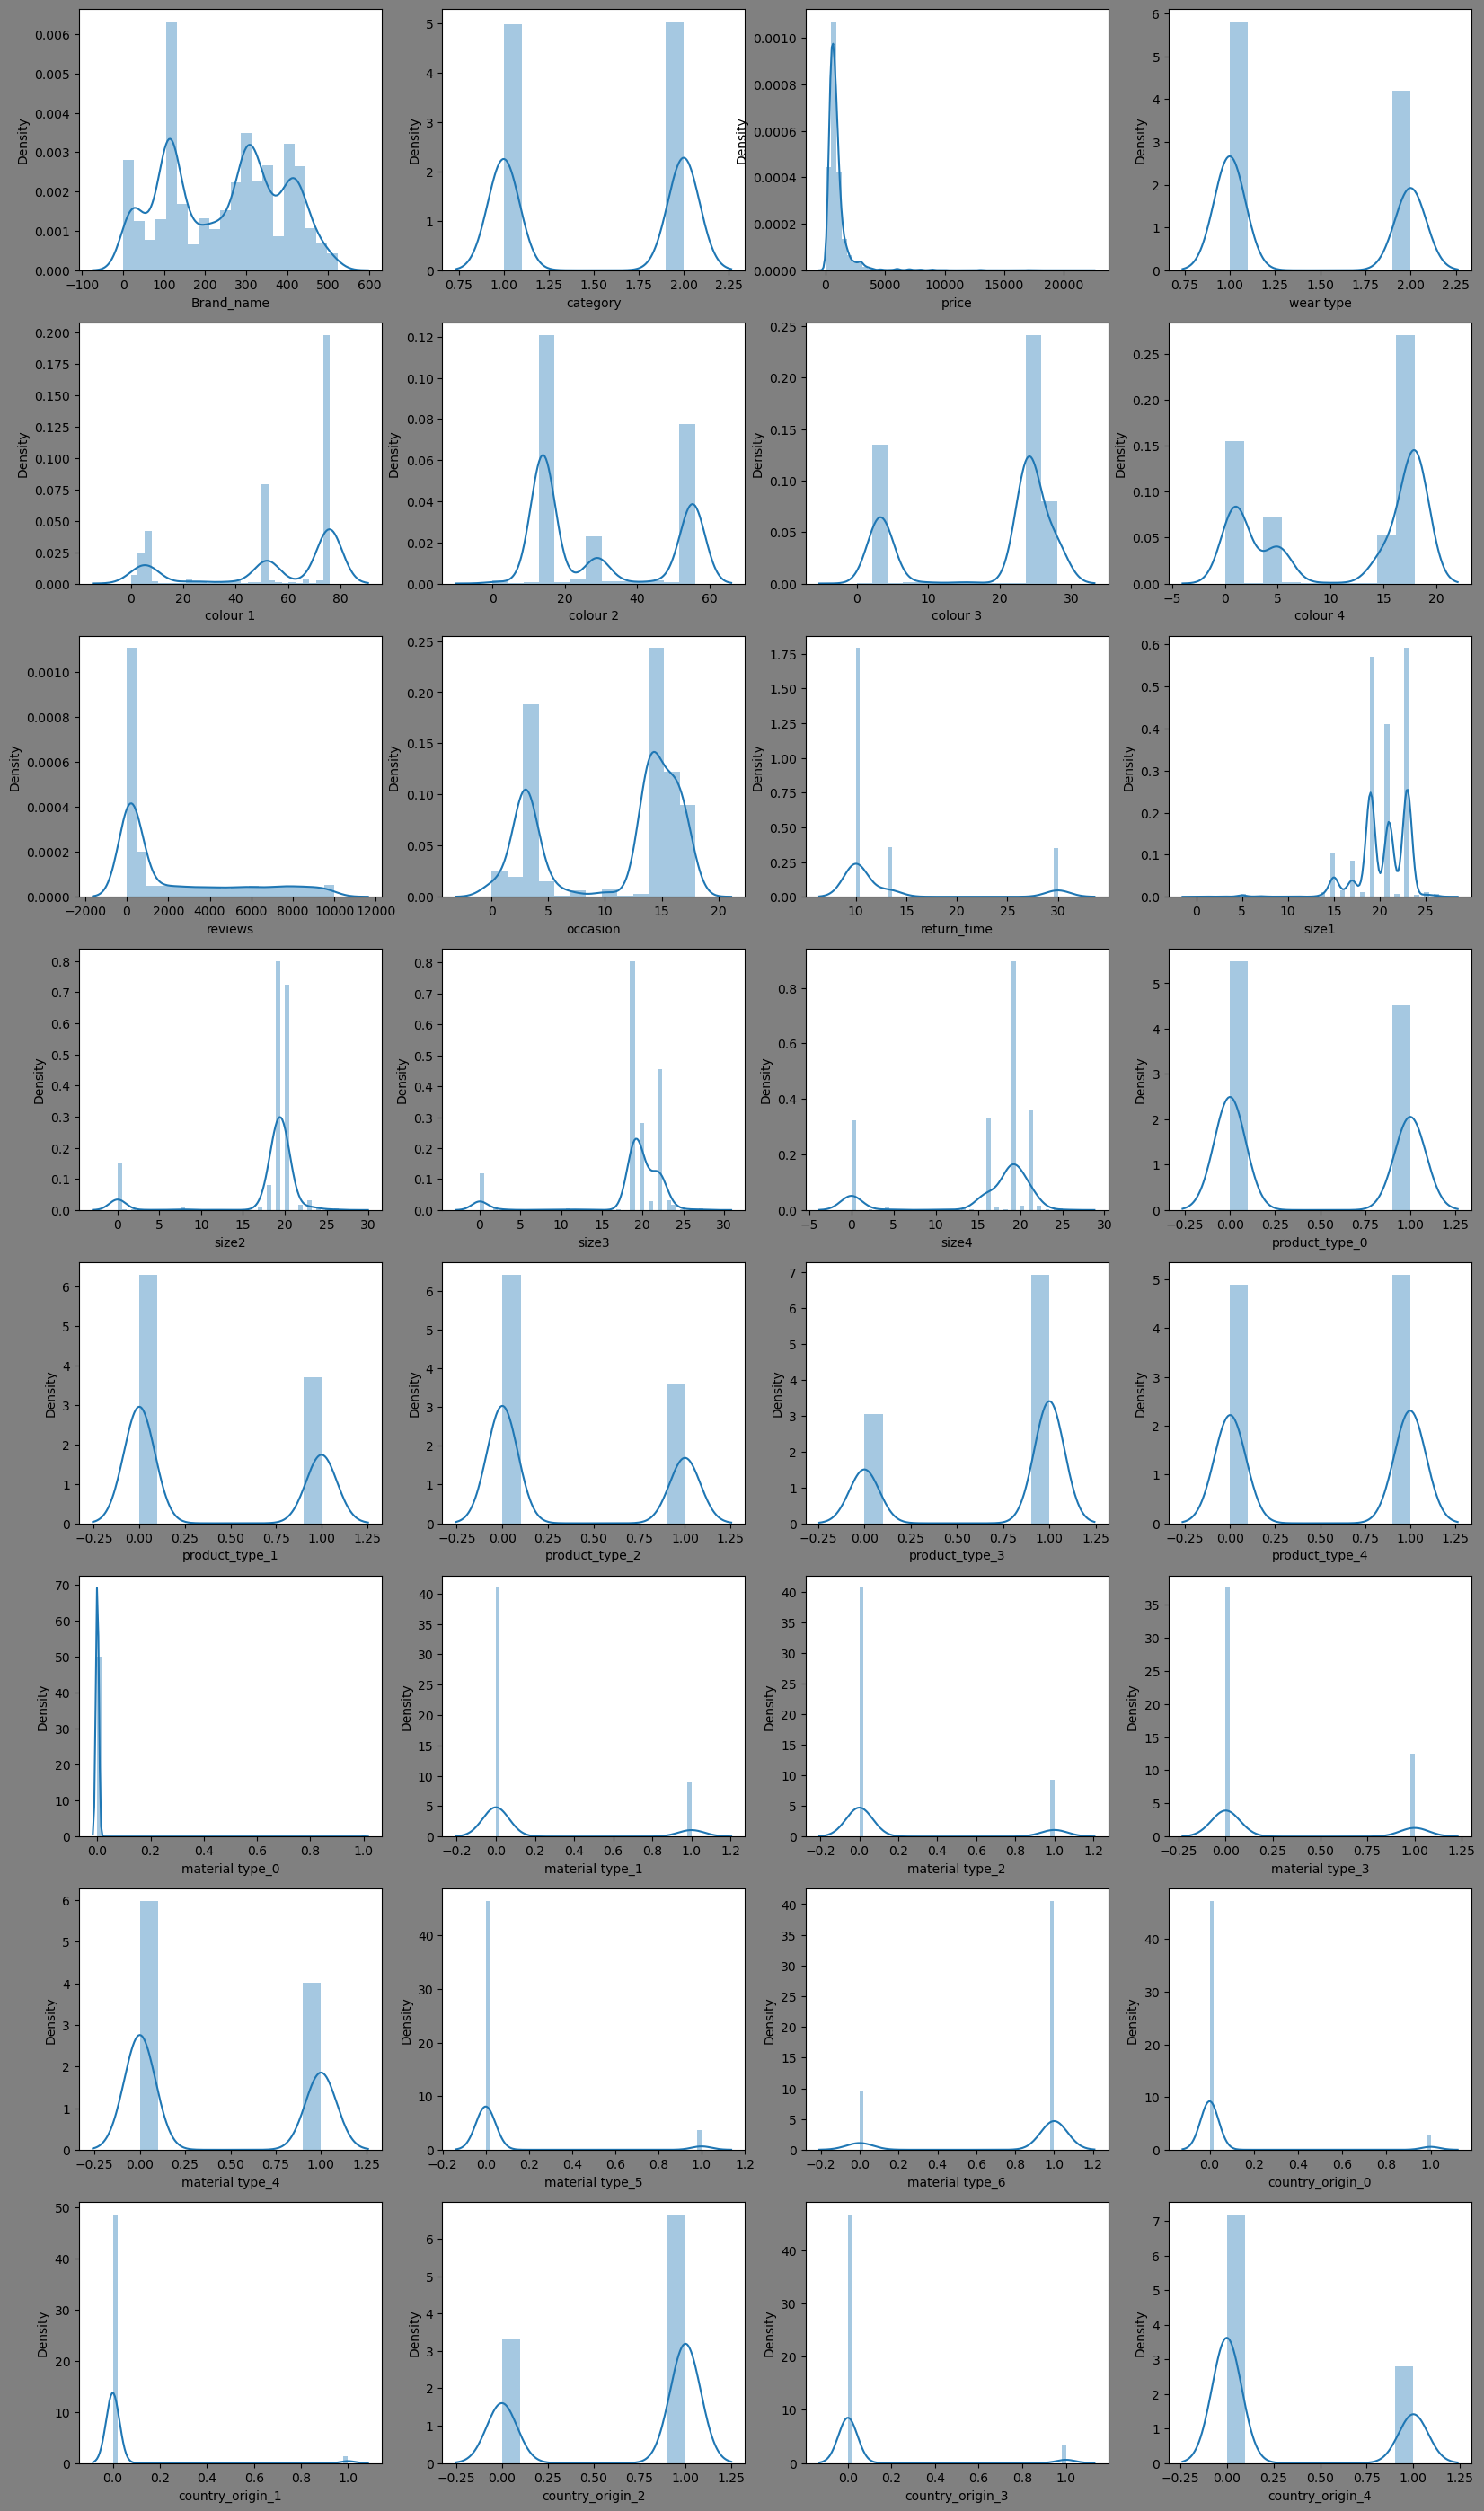

In [40]:
plt.figure(figsize = (20, 40), facecolor= 'grey')
pn = 1
for i in data:
    if pn < 40:
        ax= plt.subplot(9,4, pn)
        sns.distplot(data[i])
        pn += 1

<Axes: >

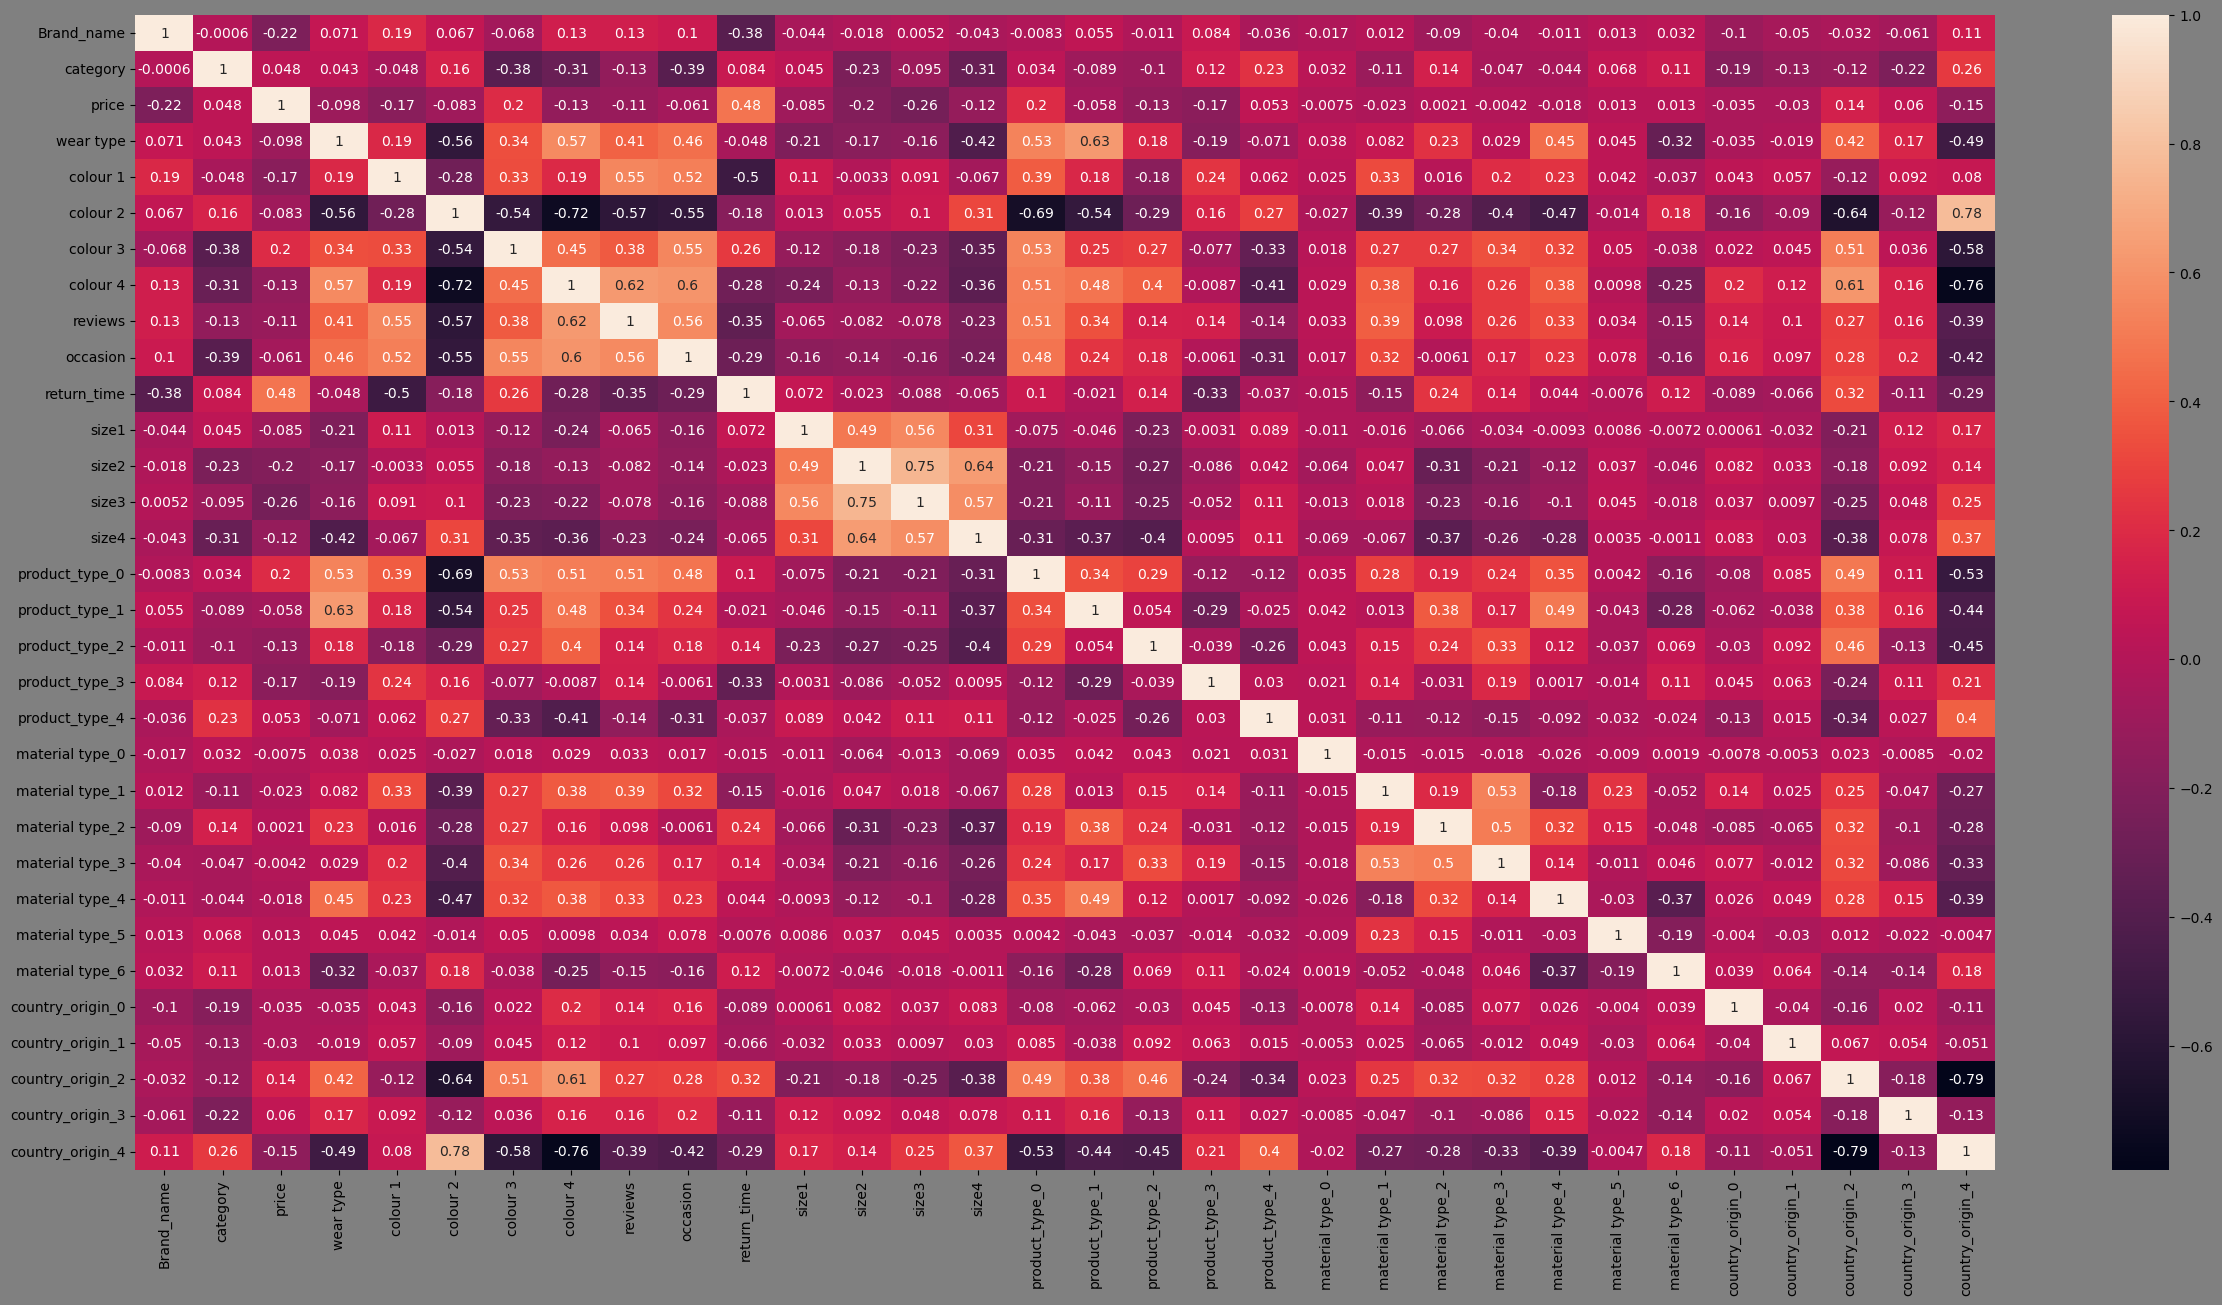

In [48]:
plt.figure(figsize = (30, 15), facecolor= 'grey')
sns.heatmap(data.corr(), annot = True)

* as the above heat map reports that all the columns are correctly corelated each other 

In [51]:
data.skew()

Brand_name          -0.051196
category            -0.010876
price                2.757052
wear type            0.327879
colour 1            -0.948125
colour 2             0.480517
colour 3            -0.800474
colour 4            -0.379937
reviews              1.133674
occasion            -0.552345
return_time          1.965228
size1               -1.726331
size2               -2.697415
size3               -2.744138
size4               -1.560570
product_type_0       0.193955
product_type_1       0.537767
product_type_2       0.593459
product_type_3      -0.842275
product_type_4      -0.039433
material type_0     31.280980
material type_1      1.656544
material type_2      1.615513
material type_3      1.156566
material type_4      0.399259
material type_5      3.287005
material type_6     -1.578488
country_origin_0     3.825959
country_origin_1     5.917693
country_origin_2    -0.702426
country_origin_3     3.494008
country_origin_4     0.978406
dtype: float64

* as the above skewness there is no much skewness is observed from the columns having continues data
* the material_type_0 column is the catergorical so i dont want to lead for reducing the skewenss
* price column is bit skewed 

In [50]:
#transforming the skewness found in price column
data['price'] = np.sqrt(data['price'])

# target : price 

In [53]:
x = data.drop(['price'], axis = 1)
y = data['price']

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.01, random_state=120)

In [64]:
ba = 0
brs= 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pdt = lr.predict(x_test)
    ac = r2_score(y_test, pdt)
    if ac > ba:
        ba= ac
        brs = i
print( ba , 'and', brs)
    

0.5832619013642664 and 120


In [66]:
regressor = [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),AdaBoostRegressor(),
             GradientBoostingRegressor(),SVR(),KNeighborsRegressor()]

In [67]:
def metric_score(rg, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_score = rg.predict(x_train)
        result_type = "train"
    else:
        y_score = rg.predict(x_test)
        result_type = "test"

    mse = mean_squared_error(y_train if train else y_test, y_score)
    r2 = r2_score(y_train if train else y_test, y_score) * 100
    
    print(f'\n ============ {result_type} result ==========')
    print(f'{result_type} R2 score: {r2:.2f}%')
    print(f'{result_type}  MSE : {mse:.4f}')


In [68]:
for rg in regressor:
    print(f'\n================== {rg.__class__.__name__} ==================')
    rg.fit(x_train, y_train)
    metric_score(rg, x_train, x_test, y_train, y_test, train=True)
    metric_score(rg, x_train, x_test, y_train, y_test, train=False)


================== LinearRegression ==================

 ============ train result ==========
train R2 score: 52.66%
train  MSE : 58.1858

 ============ test result ==========
test R2 score: 50.66%
test  MSE : 78.7496

================== DecisionTreeRegressor ==================

 ============ train result ==========
train R2 score: 99.91%
train  MSE : 0.1045

 ============ test result ==========
test R2 score: 77.35%
test  MSE : 36.1463

================== RandomForestRegressor ==================

 ============ train result ==========
train R2 score: 96.79%
train  MSE : 3.9399

 ============ test result ==========
test R2 score: 84.65%
test  MSE : 24.5077

================== AdaBoostRegressor ==================

 ============ train result ==========
train R2 score: 35.24%
train  MSE : 79.5867

 ============ test result ==========
test R2 score: 57.03%
test  MSE : 68.5889

================== GradientBoostingRegressor ==================

 ============ train result ==========
train R2 sc

In [70]:
for rg in regressor:
    cv = cross_val_score(rg, x, y, cv = 5)
    print('===========',rg, '==============')
    print('cv mean' ,cv.mean())
    a = rg.predict(x_test)
    print('diff between r2 score and cv score', (r2_score(y_test, a ) - cv.mean() ))

=========== LinearRegression() ==============
cv mean -1.1036514560413653
diff between r2 score and cv score 1.6102848534596426
=========== DecisionTreeRegressor() ==============
cv mean -7.962671957762365
diff between r2 score and cv score 8.736215025155527
=========== RandomForestRegressor() ==============
cv mean -2.066755118832391
diff between r2 score and cv score 2.9132142704444
=========== AdaBoostRegressor() ==============
cv mean -2.8862841235688146
diff between r2 score and cv score 3.4565744766350734
=========== GradientBoostingRegressor() ==============
cv mean -0.6119231124217432
diff between r2 score and cv score 1.428680004629881
=========== SVR() ==============
cv mean -0.5080703084565477
diff between r2 score and cv score 0.5162417709290488
=========== KNeighborsRegressor() ==============
cv mean -0.42854980807577264
diff between r2 score and cv score 1.1094428671087715


* the Decision Tree Regressor and AdaBoost Regressor stand out as they have the largest differences between the R2 score and the CV score. This suggests that these models may be overfitting or not generalizing well to unseen data.
* Therefore, focusing on hyperparameter tuning for the Decision Tree Regressor would be beneficial

In [71]:
parameter = { 'max_depth': [None, 5, 10, 15],  
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]}

In [92]:
dtr = DecisionTreeRegressor()
gs = GridSearchCV(dtr, parameter, cv=10, scoring='accuracy', n_jobs=-1)
gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [93]:
gs.best_params_

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [98]:
final = DecisionTreeRegressor(max_depth=None, min_samples_leaf=1 ,min_samples_split=1)
final.fit(x_train, y_train)

DecisionTreeRegressor(min_samples_split=1)

In [99]:
pred = final.predict(x_test)
acc1 = r2_score(y_test, pred)

In [100]:
print('accuracy score after hyper para meter tuning is {}'.format(acc1 ))

accuracy score after hyper para meter tuning is 0.7642812750627751


* the accuracy score before the hyper parameter tuning is 74% but after hyper parameter tuning it is increased by 2% and gave 76% accuracy score.

In [101]:
import joblib
joblib.dump(final,'price.pkl')

['price.pkl']

In [102]:
import joblib
joblib.dump(final, 'price.pkl')
model1 = joblib.load('price.pkl')
pred = model1.predict(x_test)
ac = r2_score(y_test, pred)
ac * 100

76.4281275062775

* The Decision Tree Regressor achieved a high training R2 score of 99.91%, indicating that it learned the training data very well.
* While not as high as the training score, the test R2 score of 77.35% is still relatively good, suggesting that the model can generalize to unseen data to some extent.
* Decision trees are relatively easy to interpret and visualize compared to some other complex models. This makes them useful for understanding feature importance and how the model makes decisions.
* Decision trees are often used in ensemble methods like Random Forest and Gradient Boosting. Saving the Decision Tree model allows you to use it as a base model for ensemble learning, which can lead to better overall performance.

# target  : occasion

In [103]:
data

,Brand_name,category,price,wear type,colour 1,colour 2,colour 3,colour 4,reviews,occasion,...,material type_2,material type_3,material type_4,material type_5,material type_6,country_origin_0,country_origin_1,country_origin_2,country_origin_3,country_origin_4
0,44,1,20.976177,1,75,54,24,1,113,14,...,0,0,0,0,1,0,0,0,0,1
1,48,1,19.697716,1,75,54,24,1,339,14,...,0,0,0,0,1,0,0,0,0,1
2,44,1,21.447611,1,75,54,24,1,35,14,...,0,0,0,0,1,0,0,0,0,1
3,44,1,20.976177,1,75,54,24,1,407,14,...,0,0,0,0,1,0,0,0,0,1
4,48,1,19.697716,1,75,54,24,1,410,14,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5881,353,2,20.663978,2,76,14,24,18,5965,14,...,1,1,1,0,1,0,0,1,0,0
5882,220,2,19.467922,2,76,14,24,18,9645,14,...,1,1,1,0,1,0,0,1,0,0
5883,220,2,19.467922,2,76,14,24,18,8830,14,...,1,1,1,0,1,0,0,1,0,0
5884,369,2,22.338308,2,76,14,24,18,6804,14,...,1,1,1,0,1,0,0,1,0,0


In [109]:
x1 = data.drop(['occasion'], axis = 1)
y1 = data['occasion']

In [120]:
ba = 0
brs= 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x1,y1, test_size = 0.20, random_state = i)
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    pdt = lr.predict(x_test)
    ac = accuracy_score(y_test, pdt)
    if ac > ba:
        ba= ac
        brs = i
print( ba , 'and', brs)
    

0.46434634974533107 and 71


In [121]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.01, random_state=71)

In [124]:
classifiers = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),
               GradientBoostingClassifier(),SVC(),KNeighborsClassifier()]

In [157]:
def metric_score(clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        result_type = "train"
    else:
        pred = clf.predict(x_test)
        result_type = "test"

    accuracy = accuracy_score(y_train if train else y_test, pred) * 100
    print(f'\n ============ {result_type} result ==========')
    print(f'{result_type} result is: {accuracy:.2f}%')
for clf in classifiers:
    print(f'\n================== {clf.__class__.__name__} ==================')
    clf.fit(x_train, y_train)
    metric_score(clf, x_train, x_test, y_train, y_test, train=True)
    metric_score(clf, x_train, x_test, y_train, y_test, train=False)


================== LogisticRegression ==================

 ============ train result ==========
train result is: 42.71%

 ============ test result ==========
test result is: 40.68%

================== DecisionTreeClassifier ==================

 ============ train result ==========
train result is: 99.97%

 ============ test result ==========
test result is: 88.14%

================== RandomForestClassifier ==================

 ============ train result ==========
train result is: 99.95%

 ============ test result ==========
test result is: 91.53%

================== AdaBoostClassifier ==================

 ============ train result ==========
train result is: 33.33%

 ============ test result ==========
test result is: 28.81%

================== GradientBoostingClassifier ==================

 ============ train result ==========
train result is: 98.01%

 ============ test result ==========
test result is: 89.83%

================== SVC ==================

 ============ train result ===

In [127]:
from sklearn.model_selection import cross_val_score
for clf in classifiers:
    clf.fit(x_train, y_train)

    score = cross_val_score(clf, x1, y1, cv=5) 

    print(f'\n================== {clf.__class__.__name__} ==================')
    print("Cross-Validation Scores:", score)
    print("Mean Cross-Validation Score:", np.mean(score))
    y_pred = clf.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f'Test Accuracy: {test_accuracy:.4f}')
    print(f"Difference between Accuracy score and cross-validation of{ clf} score is", test_accuracy - np.mean(score))


================== LogisticRegression ==================
Cross-Validation Scores: [0.27928693 0.36108751 0.33474936 0.46983857 0.25828377]
Mean Cross-Validation Score: 0.3406492290693296
Test Accuracy: 0.4068
Difference between Accuracy score and cross-validation ofLogisticRegression() score is 0.06613043194761958

================== DecisionTreeClassifier ==================
Cross-Validation Scores: [0.86332767 0.72387426 0.66949873 0.67714528 0.46728972]
Mean Cross-Validation Score: 0.6802271320859773
Test Accuracy: 0.8644
Difference between Accuracy score and cross-validation ofDecisionTreeClassifier() score is 0.18417964757503968

================== RandomForestClassifier ==================
Cross-Validation Scores: [0.86757216 0.74001699 0.7502124  0.7017842  0.47323704]
Mean Cross-Validation Score: 0.7065645586820395
Test Accuracy: 0.9153
Difference between Accuracy score and cross-validation ofRandomForestClassifier() score is 0.2086896786060961

================== AdaBoostClassi

* by the above metrics i wish to move with the RANDOM FOREST CLASSIFIER to hyper para meter tuning

In [128]:
parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

In [130]:
rfc = RandomForestClassifier()
gs = GridSearchCV(rfc, parameters, cv=10, scoring='accuracy', n_jobs=-1)
gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [132]:
print(gs.best_params_)
gs.best_score_*100

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


94.13051935421124

In [164]:
final1 = RandomForestClassifier(max_depth=None, min_samples_leaf=1 ,min_samples_split=1,n_estimators=350)
final1.fit(x_train, y_train)

RandomForestClassifier(min_samples_split=1, n_estimators=350)

In [165]:
pred1 = final1.predict(x_test)
acc = accuracy_score(y_test, pred1)
print(acc*100)

91.52542372881356


* from the above model it gave accuracy score of 91.52 % after hyper para meter tuning but before it gave accuracy of 90% 
* after hyper para meter tuning the accuracy sore increased by 1.52%

In [166]:
joblib.dump(final,'occasion.pkl')

['occasion.pkl']

* Random Forest Classifier achieved a test accuracy of 91.53%, indicating that it performs well on unseen data. This is a crucial metric as it shows the model's ability to generalize to new, unseen samples.
* While there is still some difference between the training and test accuracy (0.209), it's relatively low compared to other models like the Decision Tree Classifier. This suggests that the Random Forest model is not heavily overfitting the training data and is generalizing reasonably well.
* Random Forest provides insights into feature importance, which can be valuable for understanding the factors driving the predictions and feature engineering.